<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 03 Pandas
## CSC 401
## Alex Lagarde
### 2/15/21

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
co_df = pd.read_csv('fortune500.csv', sep = ',')
print(co_df.head(6))

   Year  Rank           Company  Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                 9823.5                  806
1  1955     2       Exxon Mobil                 5661.4                584.8
2  1955     3        U.S. Steel                 3250.4                195.4
3  1955     4  General Electric                 2959.1                212.6
4  1955     5            Esmark                 2510.8                 19.1
5  1955     6          Chrysler                 2071.6                 18.5


In [ ]:
print(co_df.describe().round(2))

           Year      Rank  Revenue (in millions)
count  25500.00  25500.00               25500.00
mean    1980.00    250.50                4273.33
std       14.72    144.34               11351.88
min     1955.00      1.00                  49.70
25%     1967.00    125.75                 362.30
50%     1980.00    250.50                1019.00
75%     1993.00    375.25                3871.00
max     2005.00    500.00              288189.00


In [ ]:
print(co_df.dtypes)

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object


In [ ]:
profit = co_df['Profit (in millions)']
bad = profit.str.contains('[^0-9.-]')
print(profit[bad][:10])
print('Number of bad values:', profit[bad].count())

228     N.A.
290     N.A.
294     N.A.
296     N.A.
352     N.A.
464     N.A.
712     N.A.
857     N.A.
1225    N.A.
1372    N.A.
Name: Profit (in millions), dtype: object
Number of bad values: 369


In [ ]:
min_year = co_df.min()['Year']
max_year = co_df.max()['Year']
bins = np.arange(min_year, max_year + 1)


In [ ]:
bad_years = co_df['Year'][bad]


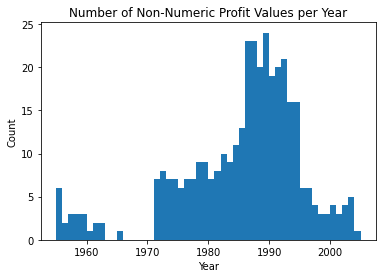

In [ ]:
plt.hist(bad_years, bins)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Non-Numeric Profit Values per Year')
plt.show()

In [ ]:
co_df_clean = co_df[~bad]

In [ ]:
co_df_clean['Profit (in millions)'] = co_df_clean['Profit (in millions)'].astype(float)
print(co_df_clean.describe().round(2))

           Year      Rank  Revenue (in millions)  Profit (in millions)
count  25131.00  25131.00               25131.00               25131.0
mean    1979.93    249.74                4304.96                 207.9
std       14.76    144.44               11396.72                1173.7
min     1955.00      1.00                  49.70              -98696.0
25%     1967.00    124.00                 357.90                   8.9
50%     1980.00    250.00                1017.60                  35.5
75%     1993.00    375.00                3916.10                 150.5
max     2005.00    500.00              288189.00               25330.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


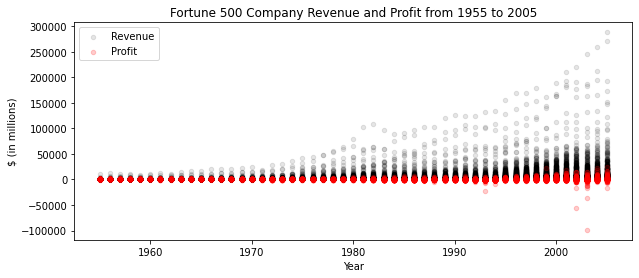

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
co_df_clean.plot(kind = 'scatter', x = 'Year', y = 'Revenue (in millions)', label = 'Revenue', color ='black', alpha = 0.1, ax = ax)
co_df_clean.plot(kind = 'scatter', x = 'Year', y = 'Profit (in millions)', label = 'Profit', color = 'red', alpha = 0.2, ax = ax)
plt.ylabel('$ (in millions)')
plt.xlabel('Year')
plt.title('Fortune 500 Company Revenue and Profit from 1955 to 2005')
plt.legend()
plt.show()


Yearly total profits, in millions of dollars, for Fortune 500 companies from 1955 to 2005 tended to remain fairly steady for 50 years. However, starting a little after 1970, there tended to be a considerable yearly rise in revenue. 